# Velocity of Money Analysis

## Importing Modules

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller

## Getting Velocity Data

In [99]:
velocity_M1 = pd.read_csv('data/M1V.csv', index_col = 0)
velocity_M1.index = pd.to_datetime(velocity_M1.index)

velocity_M2 = pd.read_csv('data/M2V.csv', index_col = 0)
velocity_M2.index = pd.to_datetime(velocity_M2.index)

velocity_MZM = pd.read_csv('data/MZMV.csv', index_col = 0)
velocity_MZM.index = pd.to_datetime(velocity_MZM.index)

In [100]:
velocity_M1 = velocity_M1.resample('Y').mean().loc[:'2018']
velocity_M2 = velocity_M2.resample('Y').mean().loc[:'2018']
velocity_MZM = velocity_MZM.resample('Y').mean().loc[:'2018']

## Getting Mkt Cap Data

In [101]:
mkt_cap = pd.read_csv('data/market_cap_usa.csv', sep = ';')
mkt_cap = mkt_cap.T.loc['1980':'2018']
mkt_cap.columns = ['MktCap']
mkt_cap.index = pd.to_datetime(mkt_cap.index)
mkt_cap['MktCap'] = mkt_cap['MktCap'].astype(float)

## Get Money Data

In [102]:
m2_data = pd.read_csv('data/M2_money_stock.csv', index_col = 0)
m1_data = pd.read_csv('data/M1_money_stock.csv', index_col = 0)
m0_data = pd.read_csv('data/monetary_base_curr_in_circulation.csv', index_col = 0)
gdp_data = pd.read_csv('data/GDP.csv', index_col = 0)

In [103]:
m2_data.index = pd.to_datetime(m2_data.index)
m2_data.columns = ['M2']
m2_data = m2_data.resample('Y').mean().loc[:'2018']

In [104]:
m1_data.index = pd.to_datetime(m1_data.index)
m1_data.columns = ['M1']
m1_data = m1_data.resample('Y').mean().loc[:'2018']

In [105]:
m0_data.index = pd.to_datetime(m0_data.index)
m0_data.columns = ['M0']
m0_data = m0_data.resample('Y').mean().loc[:'2018']

In [106]:
gdp_data.index = pd.to_datetime(gdp_data.index)
gdp_data.columns = ['GDP']
gdp_data = gdp_data.resample('Y').mean().loc[:'2018']

## Differentiating Data for stationarity

In [107]:
# MktCap test
p_value = adfuller(mkt_cap.values)[1]
print(p_value)

0.9953318299509404


5.36082125877159e-10
(38, 1)


<AxesSubplot:>

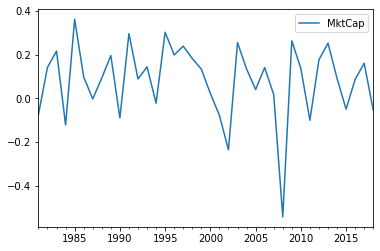

In [108]:
stationary_mkt_cap = (np.log(mkt_cap) - np.log(mkt_cap).shift(1)).dropna()
p_value = adfuller(stationary_mkt_cap.values)[1]
print(p_value)
print(stationary_mkt_cap.shape)
stationary_mkt_cap.plot()

In [109]:
# velocity  M1 test
p_value = adfuller(velocity_M1.values)[1]
print(p_value)

0.2651730671672346


0.0075034435373103996
(59, 1)


<AxesSubplot:xlabel='DATE'>

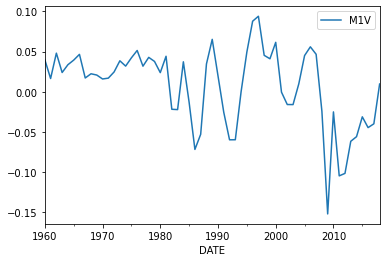

In [110]:
stationary_velocity_M1 = (np.log(velocity_M1) - np.log(velocity_M1).shift(1)).dropna()
p_value = adfuller(stationary_velocity_M1.values)[1]
print(p_value)
print(stationary_velocity_M1.shape)
stationary_velocity_M1.plot()

In [111]:
# MZMV Test
p_value = adfuller(velocity_MZM.values)[1]
print(p_value)

0.7076863118852892


6.073817731514193e-05
(59, 1)


<AxesSubplot:xlabel='DATE'>

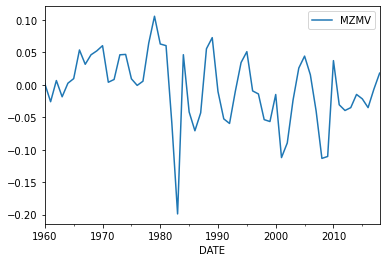

In [112]:
stationary_velocity_MZM = (np.log(velocity_MZM) - np.log(velocity_MZM).shift(1)).dropna()
p_value = adfuller(stationary_velocity_MZM.values)[1]
print(p_value)
print(stationary_velocity_MZM.shape)
stationary_velocity_MZM.plot()

In [113]:
# velocity  M2 test
p_value = adfuller(velocity_M2.values)[1]
print(p_value) 

0.6788612176409893


2.028445961906954e-05
(59, 1)


<AxesSubplot:xlabel='DATE'>

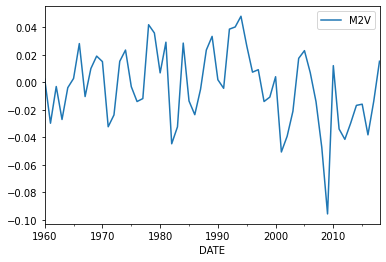

In [114]:
stationary_velocity_M2 = (np.log(velocity_M2) - np.log(velocity_M2).shift(1)).dropna()
p_value = adfuller(stationary_velocity_M2.values)[1]
print(p_value)
print(stationary_velocity_M2.shape)
stationary_velocity_M2.plot()

In [115]:
#  M0 test
p_value = adfuller(m0_data.values)[1]
print(p_value) 

1.0


0.00016350267425064216
(59, 1)


<AxesSubplot:xlabel='DATE'>

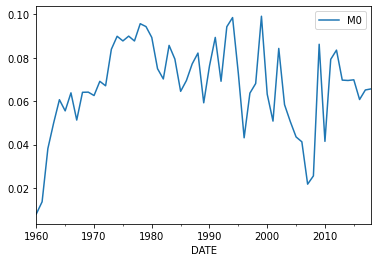

In [116]:
stationary_m0 = (np.log(m0_data) - np.log(m0_data.shift(1))).dropna()
p_value = adfuller(stationary_m0.values)[1]
print(p_value)
print(stationary_m0.shape)
stationary_m0.plot()

In [117]:
#  M1 test
p_value = adfuller(m1_data.values)[1]
print(p_value) 

0.995950225629486


0.05035878157575953
(43, 1)


<AxesSubplot:xlabel='DATE'>

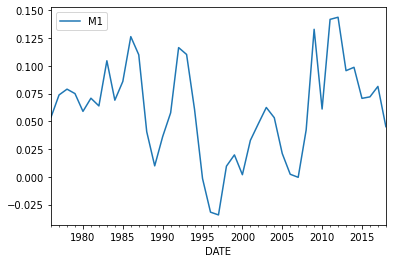

In [118]:
stationary_m1 = (np.log(m1_data) - np.log(m1_data).shift(1)).dropna()
p_value = adfuller(stationary_m1.values)[1]
print(p_value)
print(stationary_m1.shape)
stationary_m1.plot()

In [119]:
#  M2 test
p_value = adfuller(m2_data.values)[1]
print(p_value) 

0.9984086912114712


0.05592024984262006
(38, 1)


<AxesSubplot:xlabel='DATE'>

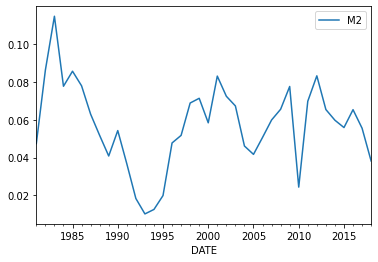

In [120]:
stationary_m2 = (np.log(m2_data) - np.log(m2_data.shift(1))).dropna()
p_value = adfuller(stationary_m2.values)[1]
print(p_value)
print(stationary_m2.shape)
stationary_m2.plot()

In [121]:
#  GDP test
p_value = adfuller(gdp_data.values)[1]
print(p_value)

0.9626020082608461


0.08517869931199712
(71, 1)


<AxesSubplot:xlabel='DATE'>

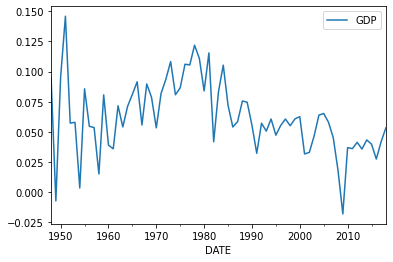

In [122]:
stationary_gdp = (np.log(gdp_data) - np.log(gdp_data.shift(1))).dropna()
p_value = adfuller(stationary_gdp.values)[1]
print(p_value)
print(stationary_gdp.shape)
stationary_gdp.plot()

## Defining Test Data

### M1

In [123]:
M1V_test_data = stationary_velocity_M1.join(stationary_mkt_cap, how = 'outer')
M1V_test_data = M1V_test_data.join(stationary_m2)
M1V_test_data = M1V_test_data.join(stationary_m1)
M1V_test_data = M1V_test_data.join(stationary_m0)
M1V_test_data = M1V_test_data.join(stationary_gdp)

M1V_test_data['MktCap'] = M1V_test_data['MktCap'].fillna(method = 'ffill')
M1V_test_data.dropna(inplace=True)

M1V_test_data = (M1V_test_data - M1V_test_data.mean())/M1V_test_data.std()
M1V_test_data.head(3)

,M1V,MktCap,M2,M1,M0,GDP
1981-12-31,0.907763,-0.906284,-0.441278,0.260683,0.403924,2.774908
1982-12-31,-0.270199,0.353615,1.292656,0.111430,0.145581,-0.447864
1983-12-31,-0.277649,0.786628,2.565725,0.986362,0.992024,1.365820


### M2

In [124]:
M2V_test_data = stationary_velocity_M2.join(stationary_mkt_cap, how = 'outer')
M2V_test_data = M2V_test_data.join(stationary_m2)
M2V_test_data = M2V_test_data.join(stationary_m1)
M2V_test_data = M2V_test_data.join(stationary_m0)
M2V_test_data = M2V_test_data.join(stationary_gdp)

M2V_test_data['MktCap'] = M2V_test_data['MktCap'].fillna(method = 'ffill')
M2V_test_data.dropna(inplace=True)
M2V_test_data = (M2V_test_data - M2V_test_data.mean())/M2V_test_data.std()
M2V_test_data.head(3)

,M2V,MktCap,M2,M1,M0,GDP
1981-12-31,1.144711,-0.906284,-0.441278,0.260683,0.403924,2.774908
1982-12-31,-1.236947,0.353615,1.292656,0.111430,0.145581,-0.447864
1983-12-31,-0.840952,0.786628,2.565725,0.986362,0.992024,1.365820


### MZM

In [125]:
MZMV_test_data = stationary_velocity_MZM.join(stationary_mkt_cap, how = 'outer')
MZMV_test_data = MZMV_test_data.join(stationary_m2)
MZMV_test_data = MZMV_test_data.join(stationary_m1)
MZMV_test_data = MZMV_test_data.join(stationary_m0)
MZMV_test_data = MZMV_test_data.join(stationary_gdp)

MZMV_test_data['MktCap'] = MZMV_test_data['MktCap'].fillna(method = 'ffill')
MZMV_test_data.dropna(inplace=True)
MZMV_test_data = (MZMV_test_data - MZMV_test_data.mean())/MZMV_test_data.std()
MZMV_test_data.head(3)

,MZMV,MktCap,M2,M1,M0,GDP
1981-12-31,1.484183,-0.906284,-0.441278,0.260683,0.403924,2.774908
1982-12-31,-0.612524,0.353615,1.292656,0.111430,0.145581,-0.447864
1983-12-31,-3.084478,0.786628,2.565725,0.986362,0.992024,1.365820


# Analysis

## M1 Velocity

Linear Regression

In [126]:
# Regression M1 velocity and Mkt Cap 
x = np.array(M1V_test_data['MktCap'].values).reshape(1,-1)[0]
y = np.array(M1V_test_data['M1V'].values).reshape(1,-1)[0]

slope, intercept, r_value, p_value, std_err = linregress(x.astype(float),y)
print('slope:', slope, 'p_value:', p_value)

slope: -0.0003882485001424527 p_value: 0.9981541977070232


## M2 Velocity

### Simple Regression

In [127]:
# Regression M2 velocity and Mkt Cap 
x = np.array(M2V_test_data['MktCap'].values).reshape(1,-1)[0]
y = np.array(M2V_test_data['M2V'].values).reshape(1,-1)[0]

slope, intercept, r_value, p_value, std_err = linregress(x.astype(float),y)
print('slope:', slope, 'p_value:', p_value)

slope: 0.061403590029207096 p_value: 0.7142019374308054


### Multiple Regression

### Velocity ~ M0, M1 and GDP

In [128]:
model = ols("M2V ~ M0 + M1 + GDP", M2V_test_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    M2V   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     11.82
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.86e-05
Time:                        21:36:04   Log-Likelihood:                -39.843
No. Observations:                  38   AIC:                             87.69
Df Residuals:                      34   BIC:                             94.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.643e-17      0.118  -3.08e-16      1.000      -0.241       0.241
M0             0.0845      0.138      0.612      0.544      -0.196       0.365
M1            -0.2454      0.140     -1.753      0.089      -0.530       0.039
GDP            0.6234      0.126      4.953      0.000       0.368       0.879
==============================================================================
Omnibus:                        3.537   Durbin-Watson:                   0.709
Prob(Omnibus):                  0.171   Jarque-Bera (JB):                2.402
Skew:                           0.584   Prob(JB):                        0.301
Kurtosis:                       3.393   Cond. No.                         1.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Velocity ~ M0, GDP and Fin Mkt

In [129]:
model = ols("M2V ~ M0 + MktCap", M2V_test_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    M2V   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                   0.08430
Date:                Sun, 09 May 2021   Prob (F-statistic):              0.919
Time:                        21:36:04   Log-Likelihood:                -53.322
No. Observations:                  38   AIC:                             112.6
Df Residuals:                      35   BIC:                             117.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.643e-17      0.166  -2.19e-16      1.000      -0.338       0.338
M0             0.0326      0.172      0.190      0.851      -0.317       0.382
MktCap         0.0550      0.172      0.320      0.751      -0.294       0.404
==============================================================================
Omnibus:                        2.592   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.274   Jarque-Bera (JB):                1.616
Skew:                          -0.478   Prob(JB):                        0.446
Kurtosis:                       3.326   Cond. No.                         1.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Velocity ~ M2 GDP and MktCap

In [130]:
model = ols("M2V ~ M2 + GDP + MktCap", M2V_test_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    M2V   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     347.5
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.45e-25
Time:                        21:36:04   Log-Likelihood:                 12.236
No. Observations:                  38   AIC:                            -16.47
Df Residuals:                      34   BIC:                            -9.921
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.643e-17      0.030  -1.21e-15      1.000      -0.061       0.061
M2            -0.7091      0.031    -23.218      0.000      -0.771      -0.647
GDP            0.6426      0.031     21.052      0.000       0.581       0.705
MktCap         0.0272      0.030      0.892      0.379      -0.035       0.089
==============================================================================
Omnibus:                       63.506   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.219
Skew:                          -3.836   Prob(JB):                    1.39e-132
Kurtosis:                      21.018   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Granger Causality Test

In [131]:
data = M2V_test_data[['M2V', 'MktCap']]
data.head(3)

,M2V,MktCap
1981-12-31,1.144711,-0.906284
1982-12-31,-1.236947,0.353615
1983-12-31,-0.840952,0.786628


In [132]:
gc_res = grangercausalitytests(data, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=15.3438 , p=0.0004  , df_denom=34, df_num=1
ssr based chi2 test:   chi2=16.6976 , p=0.0000  , df=1
likelihood ratio test: chi2=13.7807 , p=0.0002  , df=1
parameter F test:         F=15.3438 , p=0.0004  , df_denom=34, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=7.7500  , p=0.0019  , df_denom=31, df_num=2
ssr based chi2 test:   chi2=18.0001 , p=0.0001  , df=2
likelihood ratio test: chi2=14.5968 , p=0.0007  , df=2
parameter F test:         F=7.7500  , p=0.0019  , df_denom=31, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.8763  , p=0.0075  , df_denom=28, df_num=3
ssr based chi2 test:   chi2=18.2860 , p=0.0004  , df=3
likelihood ratio test: chi2=14.7114 , p=0.0021  , df=3
parameter F test:         F=4.8763  , p=0.0075  , df_denom=28, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.6532  , p=0.0178  , df_d

### Granger Causality:
MktCap (Financial Markets) granger causes M2 velocity

In [133]:
data_inv = M2V_test_data[['MktCap', 'M2V']]
gc_res = grangercausalitytests(data_inv, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3022  , p=0.5861  , df_denom=34, df_num=1
ssr based chi2 test:   chi2=0.3288  , p=0.5664  , df=1
likelihood ratio test: chi2=0.3274  , p=0.5672  , df=1
parameter F test:         F=0.3022  , p=0.5861  , df_denom=34, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.0223  , p=0.3716  , df_denom=31, df_num=2
ssr based chi2 test:   chi2=2.3743  , p=0.3051  , df=2
likelihood ratio test: chi2=2.2993  , p=0.3168  , df=2
parameter F test:         F=1.0223  , p=0.3716  , df_denom=31, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6208  , p=0.6074  , df_denom=28, df_num=3
ssr based chi2 test:   chi2=2.3279  , p=0.5072  , df=3
likelihood ratio test: chi2=2.2537  , p=0.5214  , df=3
parameter F test:         F=0.6208  , p=0.6074  , df_denom=28, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.3973  , p=0.8086  , df_d

### Granger Causality:
No evidence that M2V causes MktCap (Fin Mkts)

## MZM Velocity

In [134]:
# Regression MZM velocity and Mkt Cap 

x = np.array(MZMV_test_data['MktCap'].values).reshape(1,-1)[0]
y = np.array(MZMV_test_data['MZMV'].values).reshape(1,-1)[0]

slope, intercept, r_value, p_value, std_err = linregress(x.astype(float),y)
print('slope:', slope, 'p_value:', p_value)

slope: 0.08414396738019041 p_value: 0.6154822768432137


## Velocity ~ M0, M1, M2 and GDP

In [135]:
model = ols("MZMV ~ M0 + M1 + M2 + GDP", MZMV_test_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MZMV   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     12.46
Date:                Sun, 09 May 2021   Prob (F-statistic):           2.78e-06
Time:                        21:36:04   Log-Likelihood:                -35.928
No. Observations:                  38   AIC:                             81.86
Df Residuals:                      33   BIC:                             90.04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.898e-17      0.108   5.44e-16      1.000      -0.221       0.221
M0            -0.0919      0.127     -0.724      0.474      -0.350       0.166
M1            -0.0501      0.132     -0.378      0.708      -0.319       0.219
M2            -0.6081      0.114     -5.347      0.000      -0.839      -0.377
GDP            0.4133      0.115      3.586      0.001       0.179       0.648
==============================================================================
Omnibus:                       13.446   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.079
Skew:                          -1.217   Prob(JB):                     0.000877
Kurtosis:                       4.721   Cond. No.                         1.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Velocity ~ MktCap, M0 and GDP

In [136]:
model = ols("MZMV ~ M0 + GDP + MktCap", MZMV_test_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MZMV   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     3.383
Date:                Sun, 09 May 2021   Prob (F-statistic):             0.0292
Time:                        21:36:04   Log-Likelihood:                -48.450
No. Observations:                  38   AIC:                             104.9
Df Residuals:                      34   BIC:                             111.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.898e-17      0.149   3.97e-16      1.000      -0.302       0.302
M0            -0.1607      0.154     -1.041      0.305      -0.475       0.153
GDP            0.4627      0.151      3.055      0.004       0.155       0.770
MktCap         0.1085      0.154      0.707      0.485      -0.203       0.420
==============================================================================
Omnibus:                       29.065   Durbin-Watson:                   1.513
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.551
Skew:                          -1.775   Prob(JB):                     3.93e-17
Kurtosis:                       8.926   Cond. No.                         1.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Velocity ~ M0, M1, M2, GDP and MktCap

In [137]:
model = ols("MZMV ~ M2 + GDP + MktCap", MZMV_test_data).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MZMV   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     16.30
Date:                Sun, 09 May 2021   Prob (F-statistic):           9.76e-07
Time:                        21:36:04   Log-Likelihood:                -36.476
No. Observations:                  38   AIC:                             80.95
Df Residuals:                      34   BIC:                             87.50
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.898e-17      0.108   5.44e-16      1.000      -0.220       0.220
M2            -0.6214      0.110     -5.647      0.000      -0.845      -0.398
GDP            0.4116      0.110      3.741      0.001       0.188       0.635
MktCap         0.0566      0.110      0.515      0.610      -0.167       0.280
==============================================================================
Omnibus:                       18.761   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.541
Skew:                          -1.485   Prob(JB):                     4.69e-06
Kurtosis:                       5.585   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Granger Causality Test

In [138]:
data = MZMV_test_data[['MZMV', 'MktCap']]
gc_res = grangercausalitytests(data, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9328  , p=0.1735  , df_denom=34, df_num=1
ssr based chi2 test:   chi2=2.1033  , p=0.1470  , df=1
likelihood ratio test: chi2=2.0457  , p=0.1526  , df=1
parameter F test:         F=1.9328  , p=0.1735  , df_denom=34, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4056  , p=0.2604  , df_denom=31, df_num=2
ssr based chi2 test:   chi2=3.2646  , p=0.1955  , df=2
likelihood ratio test: chi2=3.1250  , p=0.2096  , df=2
parameter F test:         F=1.4056  , p=0.2604  , df_denom=31, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2961  , p=0.2952  , df_denom=28, df_num=3
ssr based chi2 test:   chi2=4.8602  , p=0.1823  , df=3
likelihood ratio test: chi2=4.5511  , p=0.2078  , df=3
parameter F test:         F=1.2961  , p=0.2952  , df_denom=28, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8741  , p=0.4933  , df_d

## VAR Analysis

In [139]:
from statsmodels.tsa.api import VAR

### VAR ~ M1V, MktCap

In [140]:
model = VAR(M1V_test_data[['M1V', 'MktCap']])
results = model.fit(4)
results.summary()

/Users/felipe/anaconda/envs/fenicsproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, May, 2021
Time:                     21:36:04
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.947281
Nobs:                     34.0000    HQIC:                  0.414784
Log likelihood:          -80.8544    FPE:                    1.17943
AIC:                     0.139208    Det(Omega_mle):        0.737384
--------------------------------------------------------------------
Results for equation M1V
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.036897         0.136387           -0.271           0.787
L1.M1V            0.749216         0.200171            3.743           0.000
L1.MktCap         0.335880         0.143958            2.333           0.020
L

$M1V_t = 0.749*M1V_{t-1} + 0.335*MktCap_{t-1}$

### VAR ~ M1V, MktCap, M2

In [141]:
model = VAR(M1V_test_data[['M1V', 'MktCap', 'M2']])
results = model.fit(4)
results.summary()

/Users/felipe/anaconda/envs/fenicsproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, May, 2021
Time:                     21:36:04
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   0.664423
Nobs:                     34.0000    HQIC:                 -0.489321
Log likelihood:          -87.2629    FPE:                   0.381500
AIC:                     -1.08640    Det(Omega_mle):        0.144423
--------------------------------------------------------------------
Results for equation M1V
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.009682         0.136579           -0.071           0.943
L1.M1V            0.925065         0.271955            3.402           0.001
L1.MktCap         0.385327         0.151266            2.547           0.011
L

$M1V_t = 0.925*M1V_{t-1} + 0.385*MktCap_{t-1} + 0.443*M2_{t-1}$

### VAR ~ M1V, M2, GDP, MktCap

In [142]:
model = VAR(M1V_test_data[['M1V', 'MktCap', 'M2', 'GDP']])
results = model.fit(4)
results.summary()

/Users/felipe/anaconda/envs/fenicsproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, May, 2021
Time:                     21:36:04
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                 -0.0352862
Nobs:                     34.0000    HQIC:                  -2.04694
Log likelihood:          -72.4795    FPE:                  0.0676398
AIC:                     -3.08801    Det(Omega_mle):       0.0133610
--------------------------------------------------------------------
Results for equation M1V
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.025253         0.151012            0.167           0.867
L1.M1V            0.778196         0.369121            2.108           0.035
L1.MktCap         0.396022         0.167442            2.365           0.018
L

$M1V_t = 0.778*M1V_{t-1} + 0.396*MktCap_{t-1}$

### VAR ~ M1V, M2, M1, M0, GDP, MktCap

In [143]:
model = VAR(M1V_test_data)
results = model.fit(4)
results.summary()

/Users/felipe/anaconda/envs/fenicsproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, May, 2021
Time:                     21:36:04
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -6.03490
Nobs:                     34.0000    HQIC:                  -10.4724
Log likelihood:           77.6068    FPE:                3.32821e-05
AIC:                     -12.7688    Det(Omega_mle):     1.21891e-06
--------------------------------------------------------------------
Results for equation M1V
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.095621         0.135549            0.705           0.481
L1.M1V          -51.131311        25.398289           -2.013           0.044
L1.MktCap         0.284486         0.171614            1.658           0.097
L

$M1V_t = -51.13*M1V_{t-1} + 0.28*MktCap_{t-1} + 1.15*M2_{t-1} - 42.75*M1_{t-1} + 21*GDP_{t-1} -71.35*M1V_{t-2} -0.443*MktCap_{t-2} - 58.67*M1_{t-2} + 28.77*GDP_{t-2}$

### VAR ~ M2V, MktCap

In [144]:
model = VAR(M2V_test_data[['M2V', 'MktCap']])
results = model.fit(4)
results.summary()

/Users/felipe/anaconda/envs/fenicsproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, May, 2021
Time:                     21:36:04
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   0.900190
Nobs:                     34.0000    HQIC:                  0.367693
Log likelihood:          -80.0538    FPE:                    1.12518
AIC:                    0.0921169    Det(Omega_mle):        0.703465
--------------------------------------------------------------------
Results for equation M2V
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.004552         0.135669           -0.034           0.973
L1.M2V            0.598085         0.196096            3.050           0.002
L1.MktCap         0.409199         0.146248            2.798           0.005
L

$M2V_t = 0.598*M2V_{t-1} + 0.409*MktCap_{t-1}$

### VAR ~ M2V, M2, MktCap

In [145]:
model = VAR(M2V_test_data[['M2V', 'M2', 'MktCap']])
results = model.fit(4)
results.summary()

/Users/felipe/anaconda/envs/fenicsproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 09, May, 2021
Time:                     21:36:05
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                  -0.512655
Nobs:                     34.0000    HQIC:                  -1.66640
Log likelihood:          -67.2526    FPE:                   0.117570
AIC:                     -2.26348    Det(Omega_mle):       0.0445081
--------------------------------------------------------------------
Results for equation M2V
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.018734         0.133340           -0.140           0.888
L1.M2V            0.739091         0.423870            1.744           0.081
L1.M2             0.273016         0.490365            0.557           0.578
L

$M2V_t = 0.739*M2V_{t-1} + 0.488*MktCap_{t-1}$

### VAR ~ M2V, M2, GDP, MktCap

/Users/felipe/anaconda/envs/fenicsproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


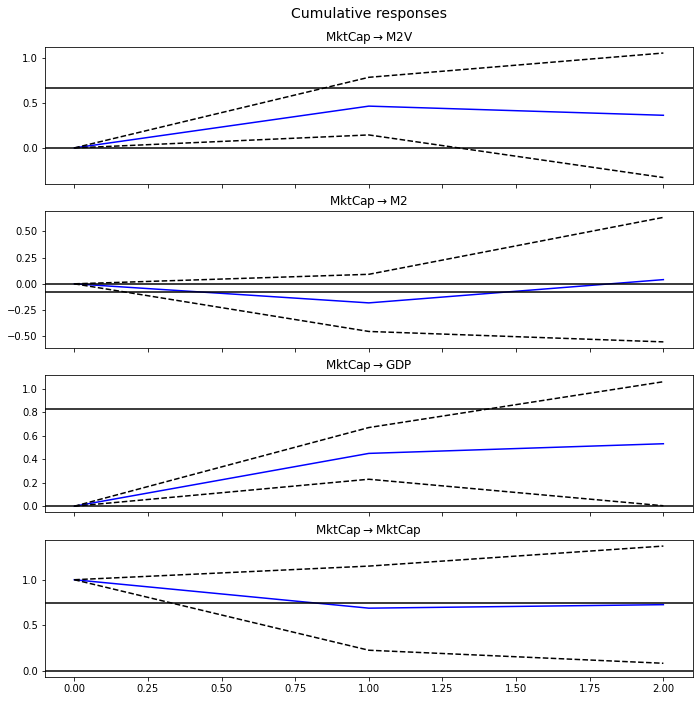

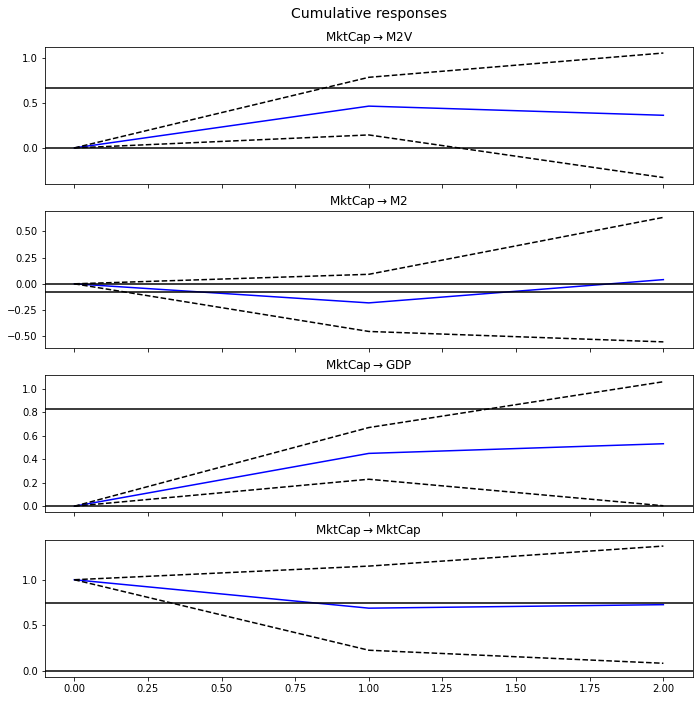

In [150]:
model = VAR(M2V_test_data[['M2V', 'M2', 'GDP', 'MktCap']])
results = model.fit(4)
results.summary()
irf = results.irf(2)
irf.plot_cum_effects(orth=False, impulse='MktCap')

$M2V_t = 32.71*M2V_{t-3} + 23.55*M2_{t-3} -23.79*GDP_{t-3}$

### VAR ~ M2V, M2, M1, M0, GDP, Mkt Cap

In [53]:
model = VAR(M2V_test_data)
results = model.fit(4)
results.summary()

/Users/felipe/anaconda/envs/fenicsproject/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 07, May, 2021
Time:                     09:11:54
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -8.88341
Nobs:                     34.0000    HQIC:                  -13.3209
Log likelihood:           126.031    FPE:                1.92805e-06
AIC:                     -15.6173    Det(Omega_mle):     7.06122e-08
--------------------------------------------------------------------
Results for equation M2V
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             1.589434         1.627542            0.977           0.329
L1.M2V          -22.353978        19.590584           -1.141           0.254
L1.MktCap         0.300925         0.179851            1.673           0.094
L

$M2V_t = 0.394*MktCap_{t-1} + 0.366*M0_{t-1}$

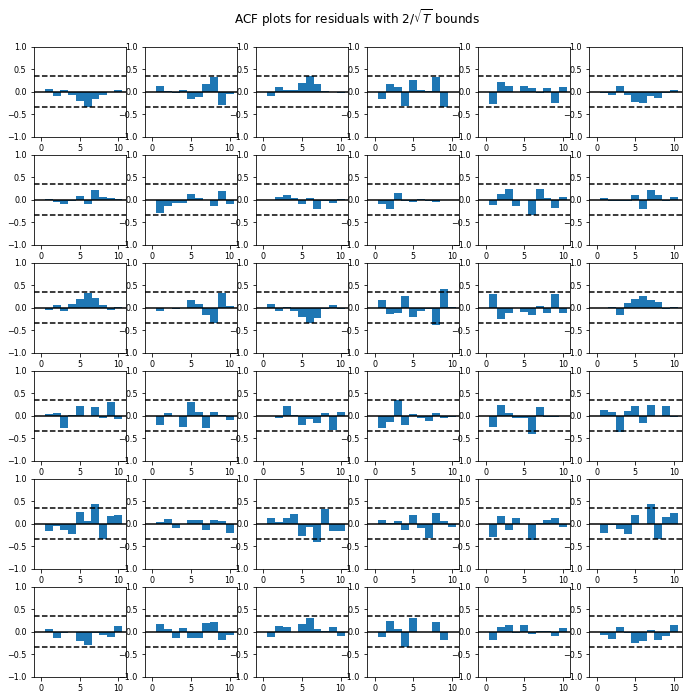

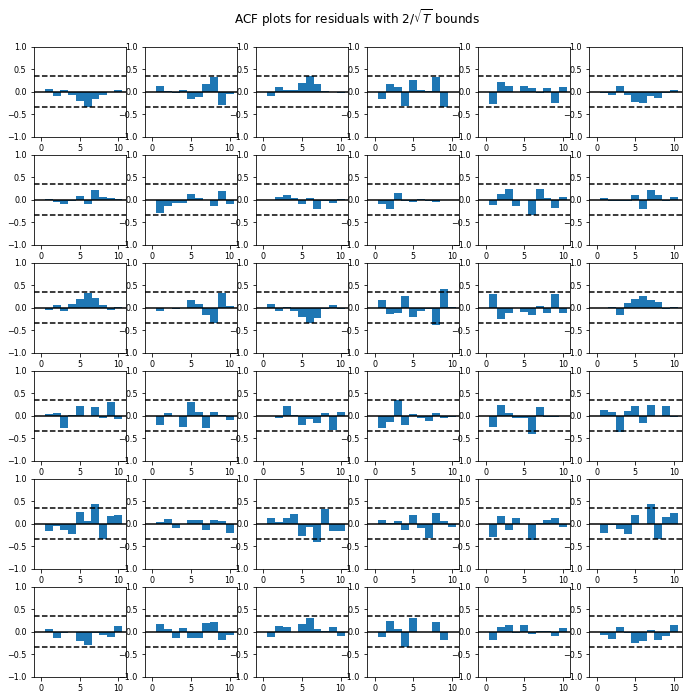

In [54]:
results.plot_acorr()